<div style="text-align: center;">
    <img src="https://i.imgur.com/I4ake6d.jpg" alt="Logo EU Copernicus WEkEO" style="width: 100%;"/>
</div>


# CMEMS AFRICA TRAINING

<div style="text-align: right"><i> INTERMEDIATE LEVEL </i></div>

***
<center><h1> Tropical Cyclone Chido </h1></center>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Run" and select "Run All Above Selected Cell".<br>


***

# Table of contents
- [1. Introduction](#1.-Introduction)
- [2. Setting up the R environment](#2.-Setting-up-the-R-environment)
- [3. Data Access](#3.-Data-Access)
- [4. Input](#4.-Input)
- [5. Plot](#5.-Plot)
    - [5.1. Basic Plot](#5.1.-Basic-Plot)
    - [5.2. Evolution of cyclone over the time with Hs](#5.2.-Evolution-of-cyclone-over-the-time-with-Hs)
    - [5.3. Evolution of cyclone with other parameters](#5.3.-Evolution-of-cyclone-with-other-parameters)
        - [5.3.1. Sea surface height](#5.3.1.-Sea-surface-height)
        - [5.3.2. Sea surface temperature](#5.3.2.-Sea-surface-temperature)    
   - [5.4. Evolution of the sea surface temperature and salinity near Mayotte](#5.4.-Evolution-of-the-sea-surface-temperature-and-salinity-near-Mayotte)  
- [6. Conclusion](#6.-Conclusion)


# 1. Introduction

[Go back to the "Table of contents"](#Table-of-contents)

This training focuses on the tropical cyclone Chido , which struck Mayotte on December 14, 2024, stood out for its exceptional intensity, making it one of the most significant meteorological events in the region in recent decades. With winds exceeding 200 km/h, it generated powerful swells and a rise in sea level, leading to significant coastal flooding. From an oceanographic perspective, Chido significantly impacted water dynamics, causing notable variations in sea surface temperature and salinity, indicative of strong vertical mixing and freshwater inputs from intense precipitation. Analyzing these parameters is crucial for understanding the impact of cyclones on the marine environment and improving models for predicting extreme weather events. 

This training will allow to see the evolution of different parameters (wave, sea surface temperature, sea surface salinity and sea surface height) over time.


# 2. Setting up the R environment
[Go back to the "Table of contents"](#Table-of-contents)

The Jupyter Notebook must be set up with all the necessary available tools from the Jupyter Notebook ecosystem. Here is the list of the modules we will be using in this exercise.

| Module name | Description |
| :---: | :---|
| **ggplot2** |[ggplot2](https://ggplot2.tidyverse.org/) is a system for declaratively creating graphics. |
| **dplyr** |[dplyr](https://dplyr.tidyverse.org/) is a library for manipulating data. |
| **RColorBrewer** |[RColorBrewer](https://cran.r-project.org/web/packages/RColorBrewer/index.html) is a library for color palettes in plot. |
| **ncdf4** |[ncdf4](https://cran.r-project.org/web/packages/ncdf4/index.html) is an interface for the 'NetCDF' file formats. |
| **gridExtra** |[gridExtra](https://cran.r-project.org/web/packages/gridExtra/index.html) is a library for arranging multiple grid-based plots on a page. |
| **lubridate** |[lubridate](https://www.rdocumentation.org/packages/lubridate/versions/1.9.3) is a library for fast and user-friendly analysis of date-time data. |


In [ ]:
# Modules system
# for ignoring Warning message
options(warn = -1) 

## Load Packages
library(ggplot2)        # System to creating graphycs
library(dplyr)          # Operators for data manipulation
library(RColorBrewer)   # For color palettes
library(ncdf4)          # High-level interface to netCDF data files
library(gridExtra)      # To arrange multiple grid-based plots on a page
library(lubridate)      # Fast and user friendly parsing of date-time data



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




If the required R libraries are not installed, you can use the following command to install them:

<center><h4> install.packages(c( "ggplot2", "dplyr", "RColorBrewer", "ncdf4", "gridExtra", "lubridate")) </h4></center>

# 3. Data Access

[Go back to the "Table of contents"](#Table-of-contents)

From the Copernicus Marine [Data Store](https://data.marine.copernicus.eu/products), you can explore all the products available with many filters to select the region you are interested in, the parameters you want to study, etc.

CMEMS provides free and open-access data on the state of the global ocean and European regional seas. The service delivers high-quality information on ocean conditions, including temperature, salinity, currents, wave, sea level, and biogeochemical parameters such as chlorophyll concentrations. CMEMS supports a variety of sectors such as marine safety, coastal management, climate change monitoring, and environmental protection. By integrating satellite and in-situ observations with numerical models, CMEMS offers reliable, near-real-time forecasts, reanalysis, and historical datasets, playing a crucial role in understanding and managing marine ecosystems.

For this training, we will use the following data:


* **Full Name**: Global Ocean Physics Analysis and Forecast
* **ProductID**: GLOBAL_ANALYSISFORECAST_PHY_001_024
* **Spatial region**:  Global Sea from Lat=(-14ºN, -9ºN), Lon=(42ºE,50ºE)
* **Depth**: Surface  
* **Variables**: temperature, salinity, ssh
* **Time period**: hourly from 2024-12-02 to 2024-12-30

And: 

* **Full Name**: Global Ocean Waves Analysis and Forecast
* **ProductID**:GLOBAL_ANALYSISFORECAST_WAV_001_027
* **Spatial region**:  Global Sea from Lat=(-14ºN, -9ºN), Lon=(42ºE,50ºE) 
* **Variables**: Hs, Tp, mean wave direction
* **Time period**: 3-hourly from 2024-12-02 to 2024-12-15

**You don't have to download it**, the files are already downloading in this training.

__Optional:__ Go to the `Product Description Main Page` and try to download this data selection by using the Graphical User Interface. Note: You'll need to have your own Copernicus marine credentials -- username and password. Creating an account is free of charge and available [here](http://marine.copernicus.eu/services-portfolio/register-now/).

# 4. Input
[Go back to the "Table of contents"](#Table-of-contents)


In [45]:
# Set the path for the NetCDF files
file <- "data/wave.nc"

In [46]:
# Load NetCDF File
data <- nc_open(file)

# Print all information in the Netcdf File
print(data)

File data/wave.nc (NC_FORMAT_NETCDF4):

     3 variables (excluding dimension variables):
        float VHM0[longitude,latitude,time]   (Contiguous storage)  
            units: m
            _FillValue: NaN
            standard_name: sea_surface_wave_significant_height
            long_name: Spectral significant wave height (Hm0)
            WMO_code: 100
            cell_methods: time:point area:mean
            missing_value: -32767
            type_of_analysis: spectral analysis
        float VTPK[longitude,latitude,time]   (Contiguous storage)  
            units: s
            _FillValue: NaN
            standard_name: sea_surface_wave_period_at_variance_spectral_density_maximum
            long_name: Wave period at spectral peak / peak period (Tp)
            WMO_code: 204
            cell_methods: time:point area:mean
            missing_value: -32767
            type_of_analysis: spectral analysis
        float VMDR[longitude,latitude,time]   (Contiguous storage)  
           

In [47]:
# Access Data
latitude <- ncvar_get(data, "latitude")  # Name of the latitude variable
longitude <- ncvar_get(data, "longitude")  # Name of the longitude variable
time <- ncvar_get(data, "time")  # Name of the time variable

Hs <- ncvar_get(data, "VHM0")       # Wave height
Tp <- ncvar_get(data, "VTPK")       # Peak period
Dir_wave <- ncvar_get(data, "VMDR")       # Mean wave direction 


In [48]:
# visualisation of variable
print(dim(Hs)) # know the dimension of the variable
print (Hs[50,40,1]) # know the value depending on longitude, latitude and time

[1]  97  61 112
[1] 1.2


In [49]:
# visualisation of variable time
print(time[1]) # know the value of the first time

[1] 1733097600


In [50]:
# Variable time is the number of seconds since 1970-01-01 00:00:00, we should convert:
time_values <- as.POSIXct(time, origin = "1970-01-01", tz = "GMT")
time_values

  [1] "2024-12-02 00:00:00 GMT" "2024-12-02 03:00:00 GMT"
  [3] "2024-12-02 06:00:00 GMT" "2024-12-02 09:00:00 GMT"
  [5] "2024-12-02 12:00:00 GMT" "2024-12-02 15:00:00 GMT"
  [7] "2024-12-02 18:00:00 GMT" "2024-12-02 21:00:00 GMT"
  [9] "2024-12-03 00:00:00 GMT" "2024-12-03 03:00:00 GMT"
 [11] "2024-12-03 06:00:00 GMT" "2024-12-03 09:00:00 GMT"
 [13] "2024-12-03 12:00:00 GMT" "2024-12-03 15:00:00 GMT"
 [15] "2024-12-03 18:00:00 GMT" "2024-12-03 21:00:00 GMT"
 [17] "2024-12-04 00:00:00 GMT" "2024-12-04 03:00:00 GMT"
 [19] "2024-12-04 06:00:00 GMT" "2024-12-04 09:00:00 GMT"
 [21] "2024-12-04 12:00:00 GMT" "2024-12-04 15:00:00 GMT"
 [23] "2024-12-04 18:00:00 GMT" "2024-12-04 21:00:00 GMT"
 [25] "2024-12-05 00:00:00 GMT" "2024-12-05 03:00:00 GMT"
 [27] "2024-12-05 06:00:00 GMT" "2024-12-05 09:00:00 GMT"
 [29] "2024-12-05 12:00:00 GMT" "2024-12-05 15:00:00 GMT"
 [31] "2024-12-05 18:00:00 GMT" "2024-12-05 21:00:00 GMT"
 [33] "2024-12-06 00:00:00 GMT" "2024-12-06 03:00:00 GMT"
 [35] "2024-12

# 5. Plot

[Go back to the "Table of contents"](#Table-of-contents)
    
## 5.1. Basic Plot
[Go back to the "Table of contents"](#Table-of-contents)

In [51]:
# Determine figure size
options(repr.plot.width =16, repr.plot.height = 10) 

In [52]:
# we create a dataframe
index<-95
df <- data.frame(expand.grid(longitude, latitude), Hs = as.vector(Hs[,,index]))
names(df) <- c("Longitude", "Latitude", "Hs")

In [53]:
# visualisation of the dataframe
df[1:20,]

,Longitude,Latitude,Hs
,<dbl[1d]>,<dbl[1d]>,<dbl>
1,42.00000,-14,1.13
2,42.08333,-14,1.14
3,42.16667,-14,1.15
4,42.25000,-14,1.15
5,42.33333,-14,1.15
6,42.41667,-14,1.14
7,42.50000,-14,1.14
8,42.58333,-14,1.13
9,42.66667,-14,1.12


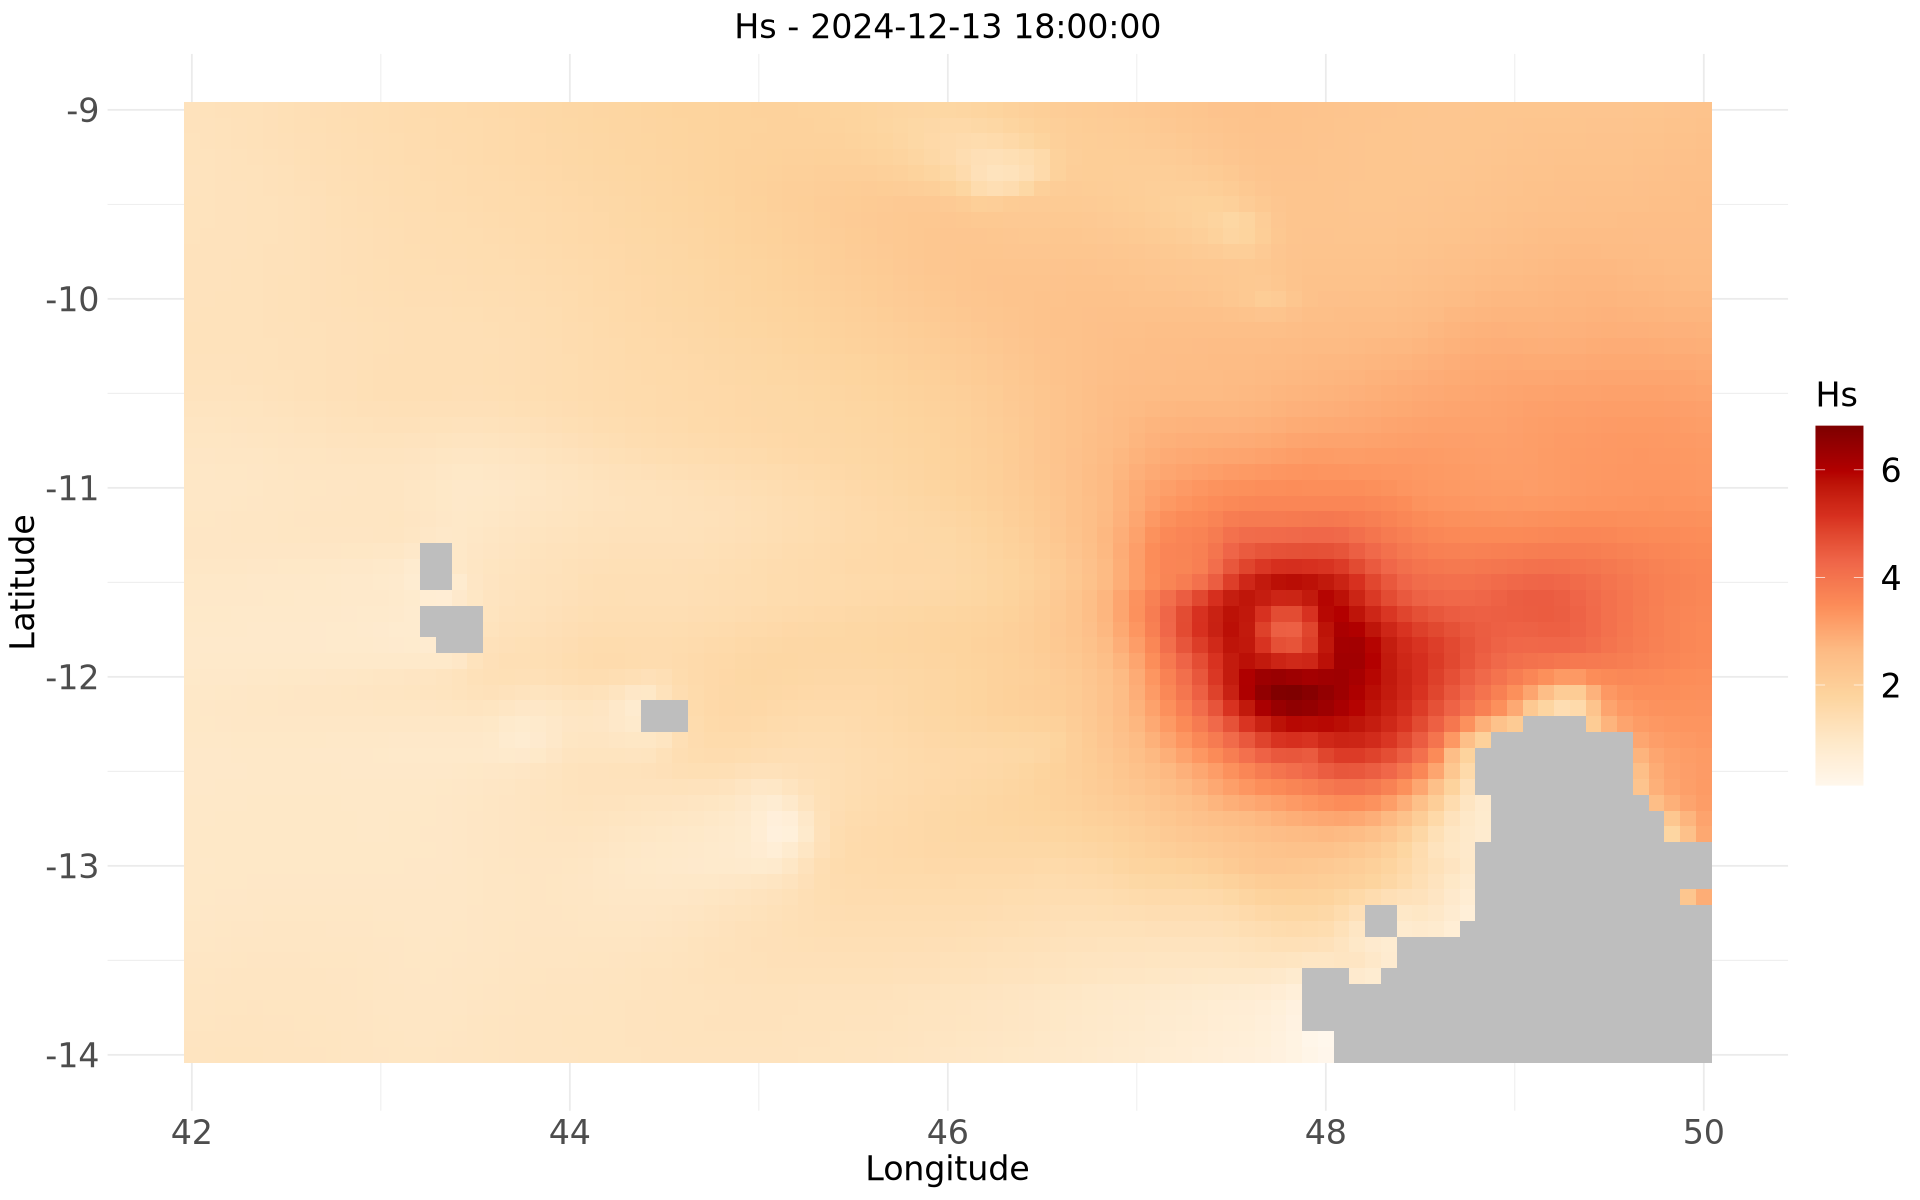

In [54]:
# Plotting
p <- ggplot() +

# Add Phosphate data 
geom_tile(data = df, aes(x=Longitude, y=Latitude, fill = Hs)) +

# Color scale options limits
scale_fill_gradientn(colors = brewer.pal(9, "OrRd"),  name="Hs",limits = c(), na.value = "grey") +

# General aesthetic options
theme_light() +

# Title and subtitle
labs(title = paste("Hs - ",time_values[index],sep=''),
     x = "Longitude",
     y = "Latitude")+

# Legend position and aesthetic options
theme_minimal()+

theme(
    axis.text.x = element_text(size = 20),  # Increase the size of the x-axis values
    axis.text.y = element_text(size = 20),  # Increase the size of the y-axis values
    plot.title = element_text(hjust = 0.5, size = 20),  # Center and increase the size of the title
    axis.title.x = element_text(size = 20),  # Increase the size of the x-axis title
    axis.title.y = element_text(size = 20),  # Increase the size of the y-axis title
    legend.text = element_text(size = 20),    # Increase the size of the legend text
    legend.title = element_text(size = 20)     # Increase the size of the legend title
)   +
  guides(fill = guide_colorbar(barwidth = 2, barheight = 15)) + # Adjust the size of the colorbar
  coord_fixed()   # Maintain proportions
    
p
# to save the figure
ggsave("./figures/basic_figure.png", plot = p, width = 12, height = 12, dpi = 300)


We see a cartographic representation of Hs on December 13, 2024 at 6:00p.m. We clearly see the passage of the cyclone which is located in the northwest of Madagascar. With waves up to 6m high. Let's now examine the evolution of the cyclone.

## 5.2. Evolution of cyclone over the time with Hs
[Go back to the "Table of contents"](#Table-of-contents)

For this part, we will compare several times to see the evolution of the cyclone. We will first create a plot function to simplify the code and finally, we will compare position of the cyclone.


In [55]:
# création of plot function
mapping <- function(longitude,latitude,var,var_name,minmax,date,color){
    options(repr.plot.width = 12, repr.plot.height = 6) 

    df <- data.frame(expand.grid(longitude, latitude), var = as.vector(var))
    names(df) <- c("Longitude", "Latitude", "var")
    p <- ggplot() +geom_tile(data = df, aes(x=Longitude, y=Latitude, fill = var)) +

    # Color scale options
     scale_fill_viridis_c(option=color,limits = minmax, name = var_name) +

    # General aesthetic options
    theme_light() +

    # Title and subtitle
    labs(title = paste(var_name, " - ",date,sep=''),
         x = "Longitude",
         y = "Latitude")+

    # Legend position and aesthetic options
    theme_minimal()+

    theme(
        axis.text.x = element_text(size = 20),  # Increase the size of the x-axis values
        axis.text.y = element_text(size = 20),  # Increase the size of the y-axis values
        plot.title = element_text(hjust = 0.5, size = 20),  # Center and increase the size of the title
        axis.title.x = element_text(size = 20),  # Increase the size of the x-axis title
        axis.title.y = element_text(size = 20),  # Increase the size of the y-axis title
        legend.text = element_text(size = 20),    # Increase the size of the legend text
        legend.title = element_text(size = 20)     # Increase the size of the legend title
    )  +
  guides(fill = guide_colorbar(barwidth = 2, barheight = 15)) +   # Adjust the size of the colorbar
  coord_fixed()   # Maintain proportions
}

In [56]:
# the index allows to define the date that we want
index1 <- which.min(abs(difftime(time_values, ymd_hms("2024-12-13 06:00:00"), units = "secs")))
index2 <- which.min(abs(difftime(time_values, ymd_hms("2024-12-13 18:00:00"), units = "secs")))
index3 <- which.min(abs(difftime(time_values, ymd_hms("2024-12-14 06:00:00"), units = "secs")))
index4 <- which.min(abs(difftime(time_values, ymd_hms("2024-12-14 18:00:00"), units = "secs")))



In [57]:
# creation of plot
p1<-mapping (longitude,latitude,Hs[,,index1],'Hs',c(0,9),time_values[index1],"viridis")
p2<-mapping (longitude,latitude,Hs[,,index2],'Hs',c(0,9),time_values[index2],"viridis")
p3<-mapping (longitude,latitude,Hs[,,index3],'Hs',c(0,9),time_values[index3],"viridis")
p4<-mapping (longitude,latitude,Hs[,,index4],'Hs',c(0,9),time_values[index4],"viridis")

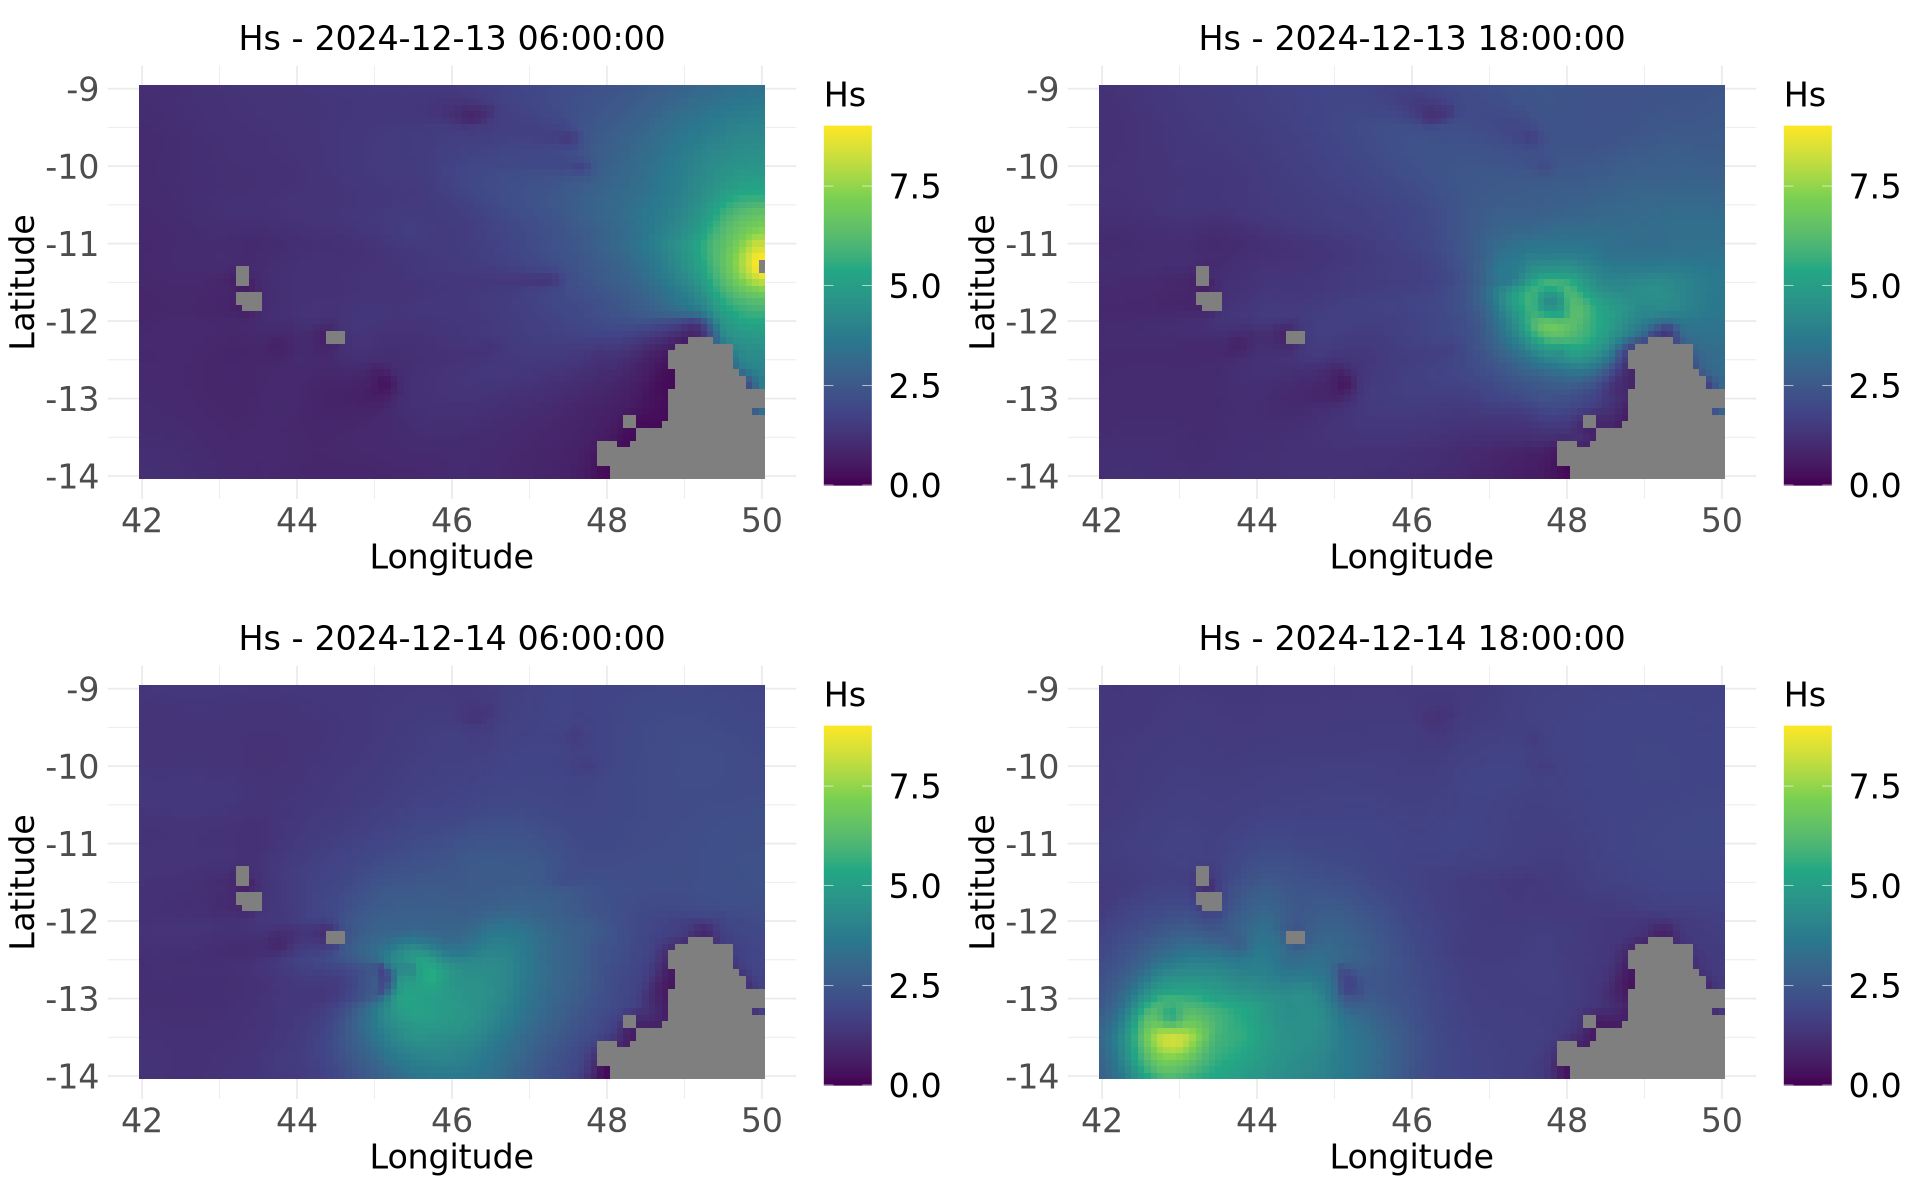

In [58]:
# Determine figure size
options(repr.plot.width =16, repr.plot.height = 10) 
p_total=grid.arrange(p1, p2, p3, p4, ncol = 2, nrow = 2)
ggsave("./figures/figure_wave_Hs.png", plot = p_total ,width =12, height = 18,  dpi = 300)

Thanks to the visualization of Hs, we can identify the positioning of the cyclone. It passes from the north of Madagascar to the west of Mayotte in 36 hours. The waves that hit Mayottes on December 14 at 6:00 a.m. are greater than 5m.

## 5.3. Evolution of cyclone with other parameters
[Go back to the "Table of contents"](#Table-of-contents)

For this part we will first load other netcdf files then we will see the impact of the cyclone on oceanographic parameters. 

### 5.3.1. Sea surface height
[Go back to the "Table of contents"](#Table-of-contents)

During a cyclone, sea level rises due to a combination of factors: intense winds and wave, and low atmospheric pressure. The strong winds and waves push seawater toward the coast, creating a surge that can lead to severe coastal flooding. Additionally, the drop in atmospheric pressure elevate the sea water due to the lower pressure on the sea surface . In coastal area, a small rise in sea level can have devastating effects. 


In [59]:
# Load sea surface height file
file <- "data/ssh.nc"
data_ssh <- nc_open(file)
 
# variables
ssh <- ncvar_get(data_ssh, "total_sea_level")     # total sea surface height

longitude_ssh<-ncvar_get(data_ssh, "longitude")
latitude_ssh<-ncvar_get(data_ssh, "latitude")
time_ssh<-ncvar_get(data_ssh, "time")
time_ssh <- as.POSIXct(time_ssh, origin = "1970-01-01", tz = "GMT")

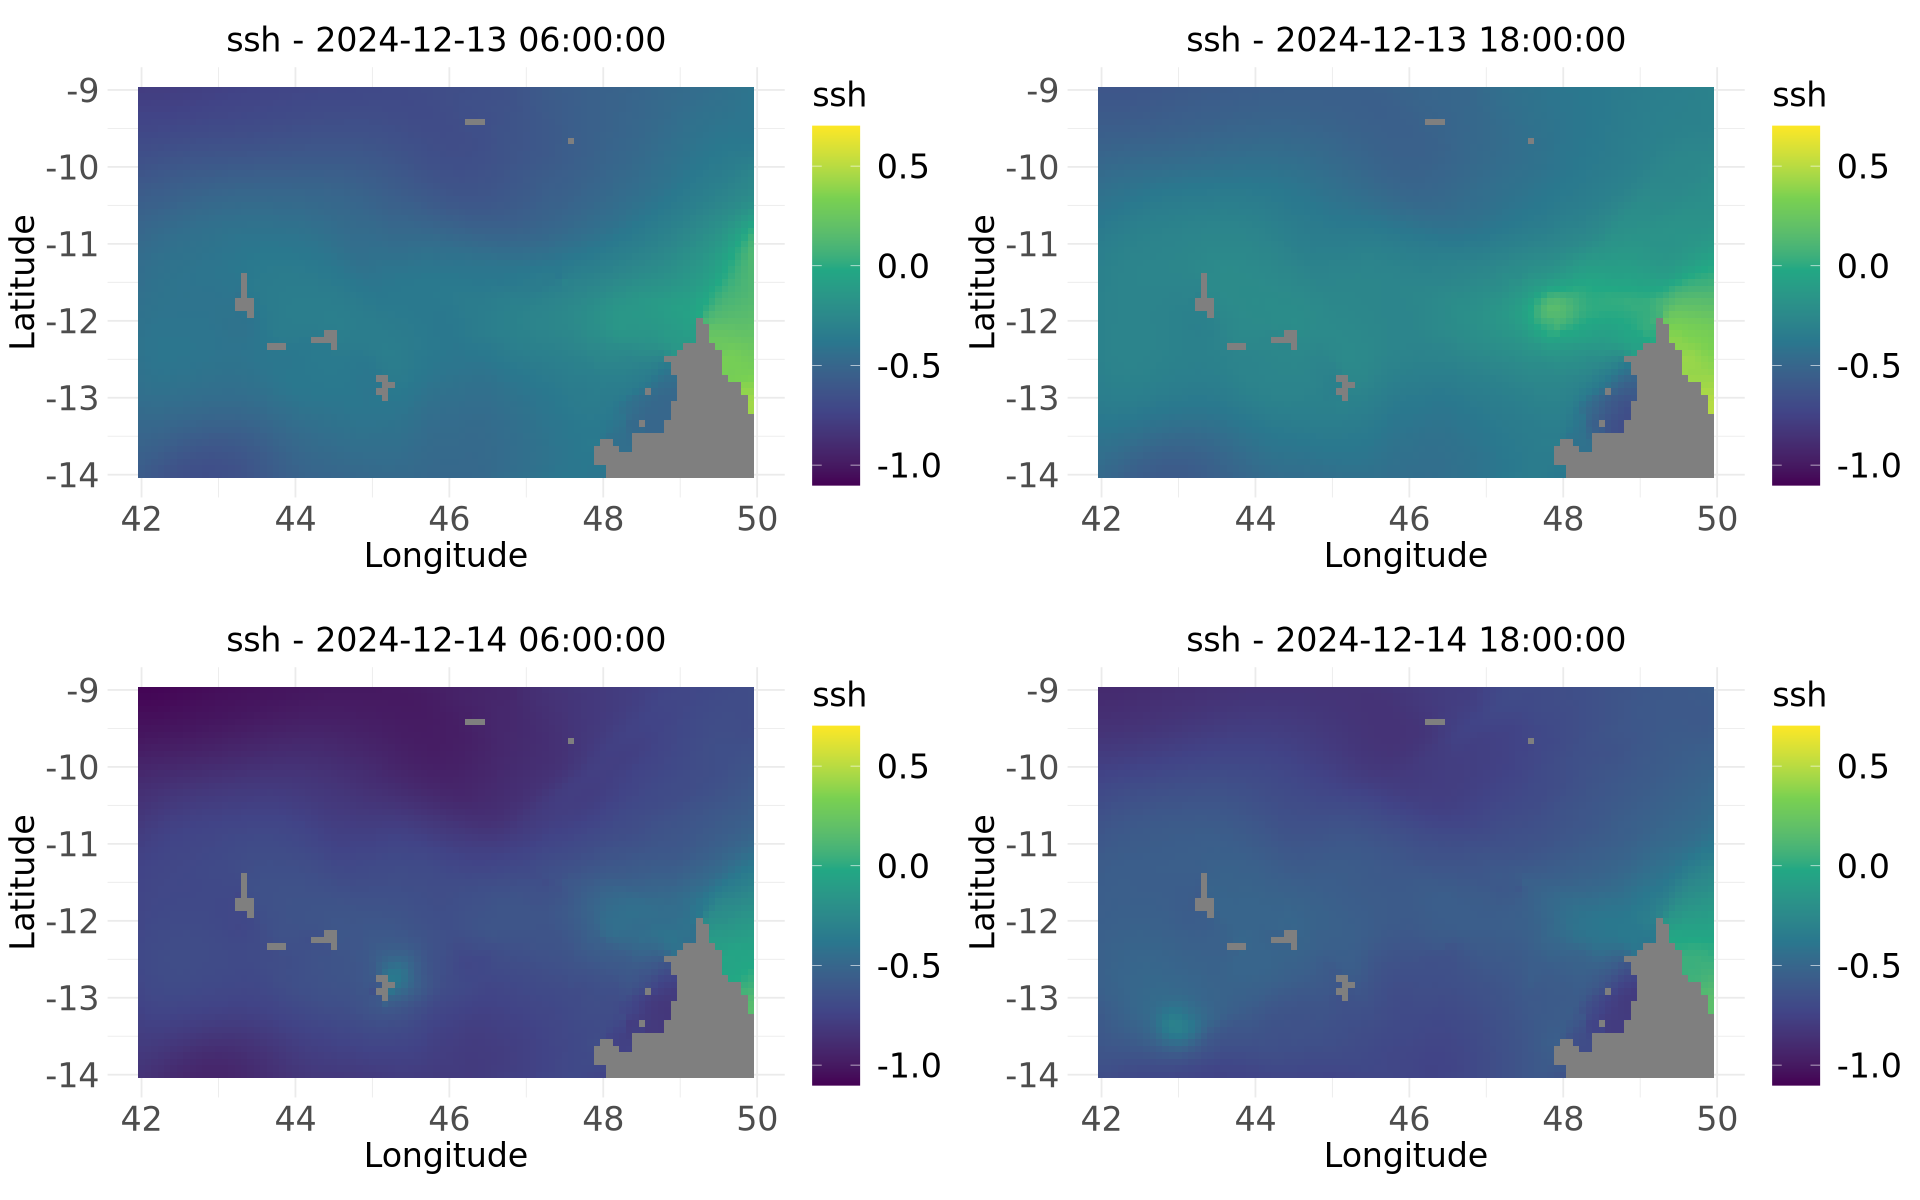

In [60]:
# the index allows to define the date that we want
index1 <- which.min(abs(difftime(time_ssh, ymd_hms("2024-12-13 06:00:00"), units = "secs")))
index2 <- which.min(abs(difftime(time_ssh, ymd_hms("2024-12-13 18:00:00"), units = "secs")))
index3 <- which.min(abs(difftime(time_ssh, ymd_hms("2024-12-14 06:00:00"), units = "secs")))
index4 <- which.min(abs(difftime(time_ssh, ymd_hms("2024-12-14 18:00:00"), units = "secs")))


# creation of plot
p1<-mapping (longitude_ssh,latitude_ssh,ssh[,,index1],'ssh',c(-1.1,0.7),time_ssh[index1],"viridis")
p2<-mapping (longitude_ssh,latitude_ssh,ssh[,,index2],'ssh',c(-1.1,0.7),time_ssh[index2],"viridis")
p3<-mapping (longitude_ssh,latitude_ssh,ssh[,,index3],'ssh',c(-1.1,0.7),time_ssh[index3],"viridis")
p4<-mapping (longitude_ssh,latitude_ssh,ssh[,,index4],'ssh',c(-1.1,0.7),time_ssh[index4],"viridis")


# Determine figure size
options(repr.plot.width =16, repr.plot.height = 10) 
p_total=grid.arrange(p1, p2, p3, p4, ncol = 2, nrow = 2)
ggsave("./figures/figure_ssh.png", plot = p_total ,width =12, height = 18,  dpi = 300)

Here we see the passage of the cyclone. The elevation here is mainly due to the decrease in atmospheric pressure. Indeed, the wind and waves have a significant impact when we are close to the coast. On the maps, most of the time the cyclone is located in the open sea. During the passage of the cyclone over Mayotte, the elevation due to the winds and waves is present but not visible correctly due to the resolution of the model.


### 5.3.2. Sea surface temperature
[Go back to the "Table of contents"](#Table-of-contents)

For this part we will first load the netcdf file then we will see the impact of the cyclone on sea surface temperature.

In [61]:
# Load chlorophyll and phytoplankton
file <- "data/temperature.nc"
data_temperature <- nc_open(file)

 
# variables
temperature <- ncvar_get(data_temperature, "thetao")     # sea surface temperature
 
longitude_temperature<-ncvar_get(data_temperature, "longitude")
latitude_temperature<-ncvar_get(data_temperature, "latitude")
time_temperature<-ncvar_get(data_temperature, "time")
time_temperature <- as.POSIXct(time_temperature, origin = "1970-01-01", tz = "GMT")

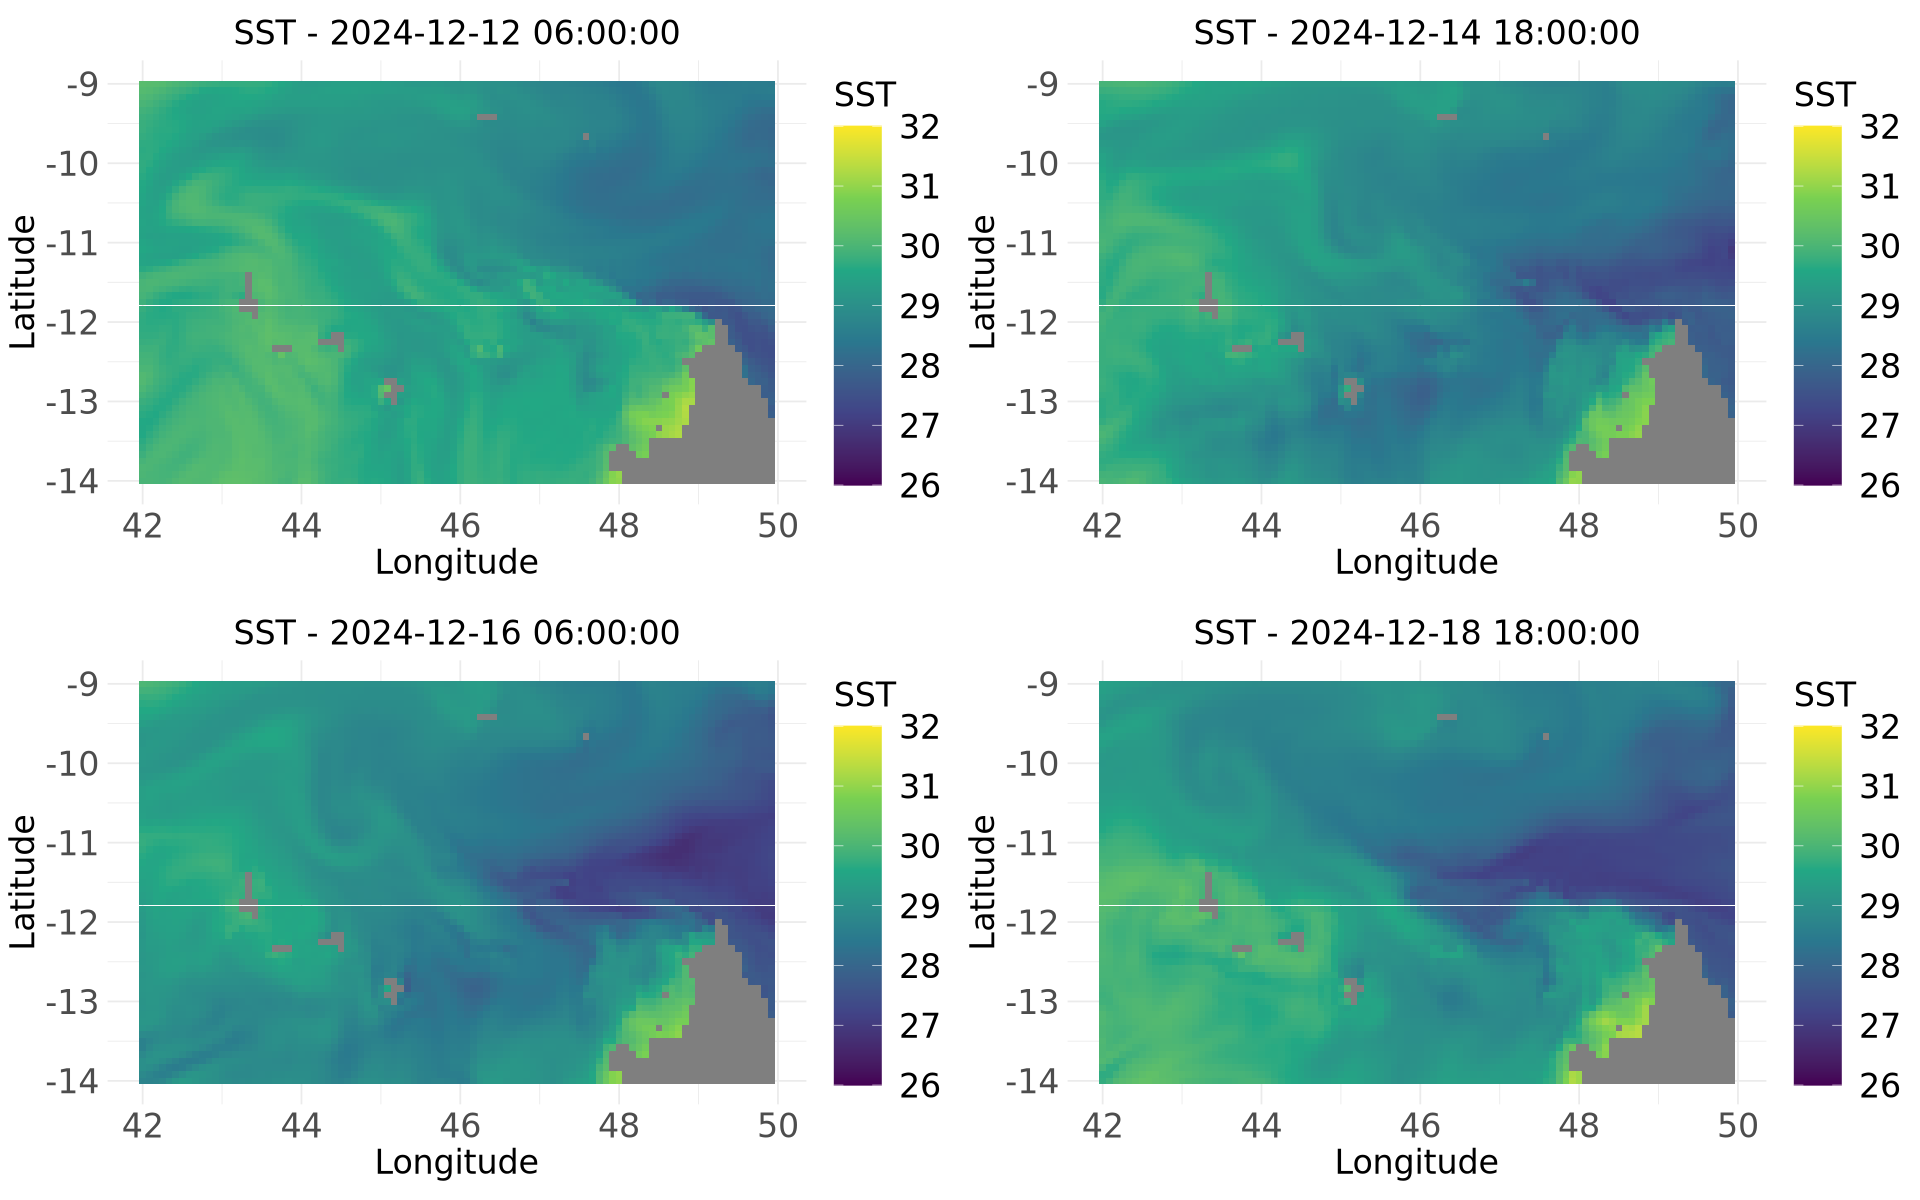

In [65]:
# the index allows to define the date that we want
index1 <- which.min(abs(difftime(time_temperature, ymd_hms("2024-12-12 06:00:00"), units = "secs")))
index2 <- which.min(abs(difftime(time_temperature, ymd_hms("2024-12-14 18:00:00"), units = "secs")))
index3 <- which.min(abs(difftime(time_temperature, ymd_hms("2024-12-16 06:00:00"), units = "secs")))
index4 <- which.min(abs(difftime(time_temperature, ymd_hms("2024-12-18 18:00:00"), units = "secs")))



# creation of plot
p1<-mapping (longitude_temperature,latitude_temperature,temperature[,,index1],'SST',c(26,32),time_temperature[index1],"viridis")
p2<-mapping (longitude_temperature,latitude_temperature,temperature[,,index2],'SST',c(26,32),time_temperature[index2],"viridis")
p3<-mapping (longitude_temperature,latitude_temperature,temperature[,,index3],'SST',c(26,32),time_temperature[index3],"viridis")
p4<-mapping (longitude_temperature,latitude_temperature,temperature[,,index4],'SST',c(26,32),time_temperature[index4],"viridis")

# Determine figure size
options(repr.plot.width =16, repr.plot.height = 10) 
p_total=grid.arrange(p1, p2, p3, p4, ncol = 2, nrow = 2)
ggsave("./figures/figure_SST.png", plot = p_total ,width =12, height = 18,  dpi = 300)

We see a slight decrease in temperature. But this is not correctly visible. For this, we will focus on a point close to Mayotte to see the evolution of the temperature during the passage of the cyclone


<div class="alert alert-block alert-info">
<h3>Option:</h3>
You can test other variables like salinity. The file is already downloaded here: "data/salinity.nc"

## 5.4. Evolution of the sea surface temperature and salinity near Mayotte
[Go back to the "Table of contents"](#Table-of-contents)

First we should load salinity variables:

In [66]:
# Load salinity variables
file <- "data/salinity.nc"
data_salinity <- nc_open(file)
 
# variables
salinity <- ncvar_get(data_salinity, "so")     # salinity
 
longitude_salinity<-ncvar_get(data_salinity, "longitude")
latitude_salinity<-ncvar_get(data_salinity, "latitude")
time_salinity<-ncvar_get(data_salinity, "time")
time_salinity <- as.POSIXct(time_salinity, origin = "1970-01-01", tz = "GMT")

The coordinate that we want to study is as follow: 
- latitude: -12.91
- longitude: 45.25

We use the the line below to define the index of longitude and latitude that we should use.

In [68]:
index_longitude <- which.min(abs(longitude_salinity-45.25))
index_latitude <- which.min(abs(latitude_salinity-(-12.91)))

# print the closest latitude and longitude
print(longitude_salinity[index_longitude])
print(latitude_salinity[index_latitude])

[1] 45.25001
[1] -12.91667


We found the longitude and latitude index for salinity. But it is also the same for temperature, because the longitude and latitude vectors between temperature and salinity are identical.

In [70]:
# verification
identical(longitude_salinity, longitude_temperature)
identical(latitude_salinity, latitude_temperature)

[1] TRUE

[1] TRUE

We define the period that we want to see on the time serie:

In [71]:
index1 <- which.min(abs(difftime(time_temperature, ymd_hms("2024-12-12 00:00:00"), units = "secs")))
index2 <- which.min(abs(difftime(time_temperature, ymd_hms("2024-12-19 18:00:00"), units = "secs")))

In [72]:
# we create the dataframe with the temperature and salinity
df=data.frame(date=time_temperature,temp=temperature[index_longitude,index_latitude,],salinity=salinity[index_longitude,index_latitude,])[index1:index2,]

We create the time serie:

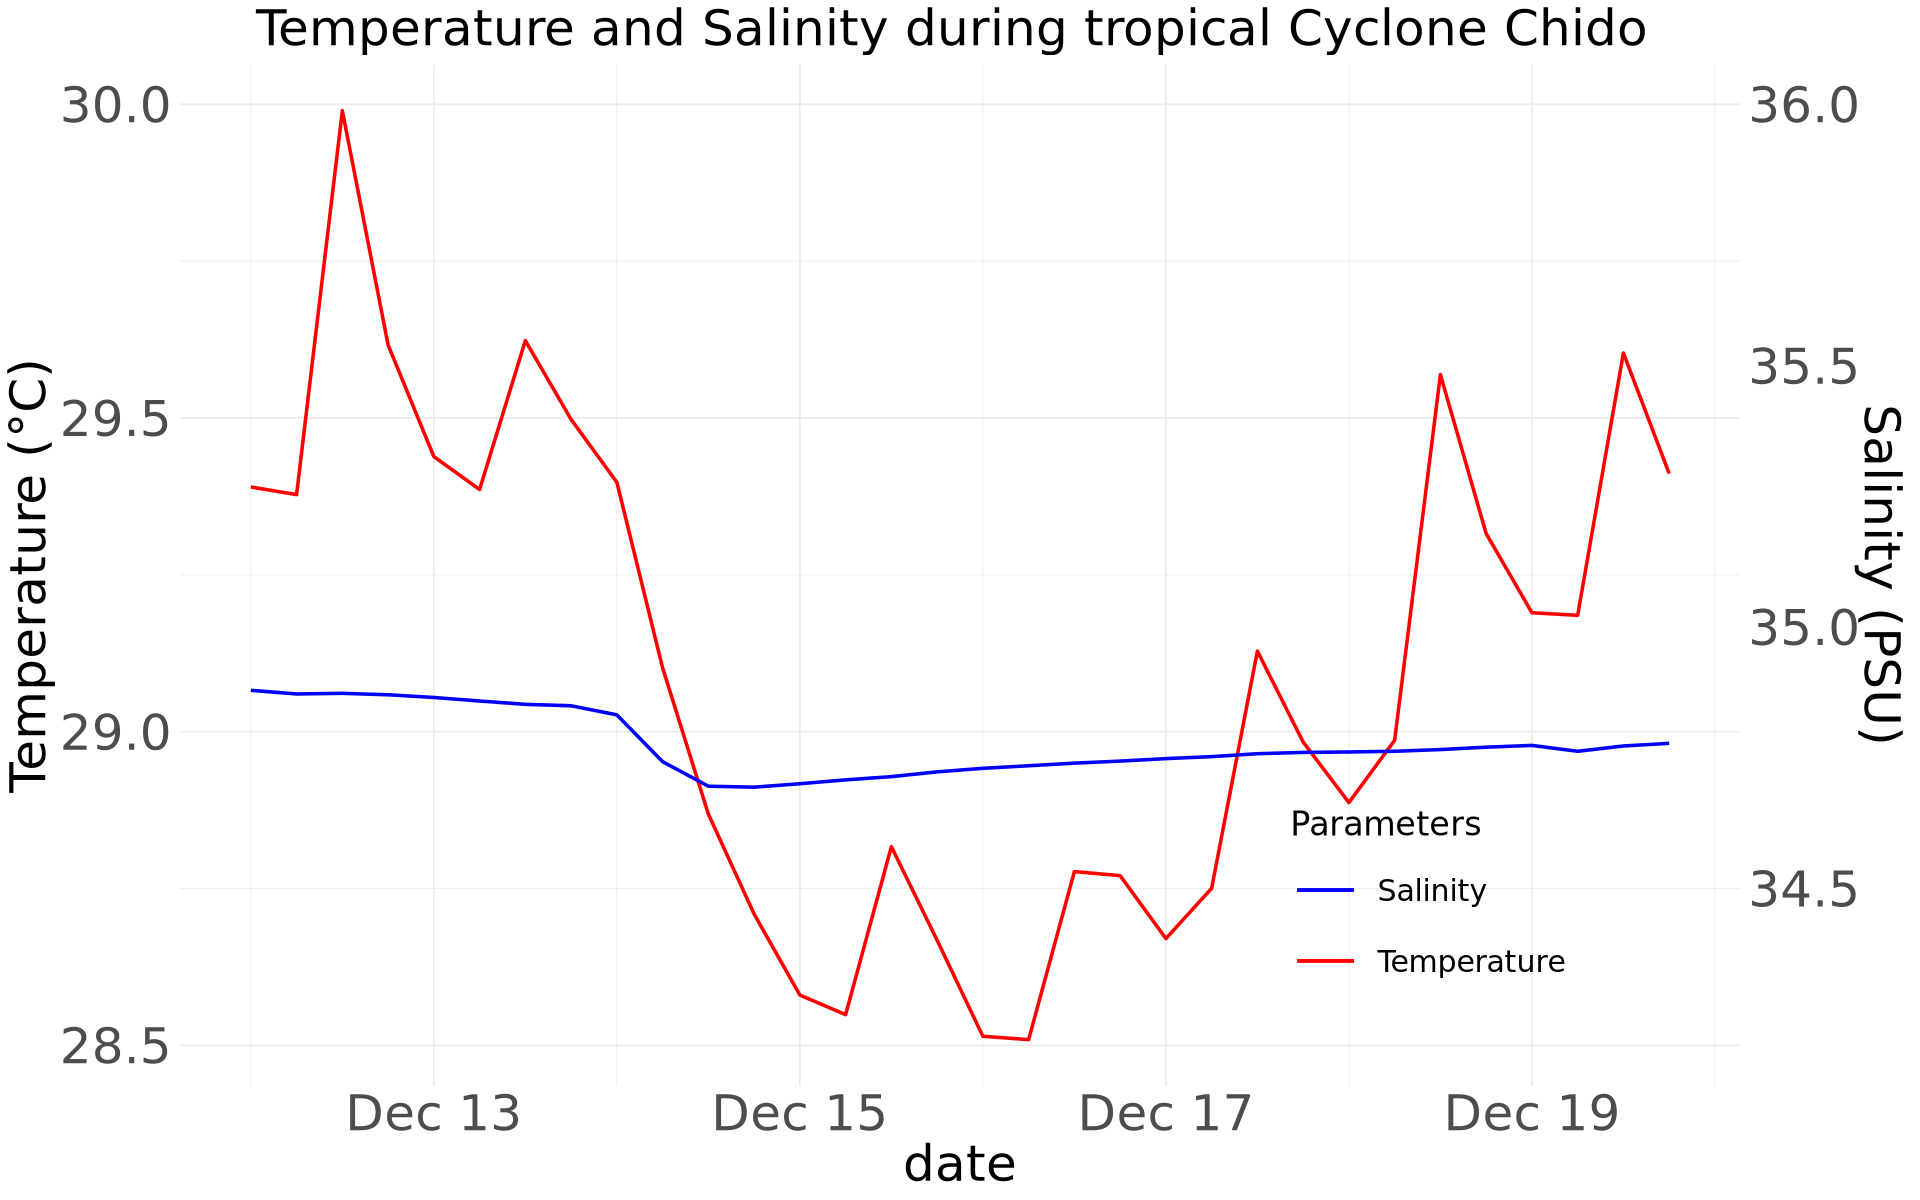

In [74]:
# Plot the graph with ggplot2
ggplot(df, aes(x = date)) +
    geom_line(aes(y = temp, color = "Temperature"), size = 1) +
    geom_line(aes(y = salinity/1.2, color = "Salinity"), size = 1) +
    scale_y_continuous(
        name = "Temperature (°C)", 
        sec.axis = sec_axis(~ .*1.2 , name = "Salinity (PSU)") # Divide by 1.2 to find the original scale
      ) +

  ggtitle("Temperature and Salinity during tropical Cyclone Chido ") +
  xlab("date") +
  ylab("Sea surface Temperature") +
  scale_color_manual(
    name = "Parameters", 
    values = c("blue", "red"))+
  theme_minimal() +

  theme(
    legend.position = c(0.8, 0.18),
    legend.title = element_text(size = 20),   # Increase tge size of legend title
    legend.text = element_text(size = 18),    # Increase tge size of text in the legend
    legend.key.size = unit(1.5, "cm"),  
    axis.text.x = element_text(size = 30),  # Increase the size of the x-axis values
    axis.text.y = element_text(size = 30),  # Increase the size of the y-axis values
    plot.title = element_text(hjust = 0.5, size = 30),  # Center and increase the size of the title
    axis.title.x = element_text(size = 30),  # Increase the size of the x-axis title
    axis.title.y = element_text(size = 30)    # Increase the size of the y-axis title
      )
ggsave("./figures/figure_temperature_salinity.png", plot = p_total ,width =12, height = 18,  dpi = 300)

During the passage of a cyclone near Mayotte, the sea surface temperature decreases due to intense mixing between the upper layers and the deeper, colder waters. This mixing is caused by strong winds and significant sea agitation. At the same time, a decrease in salinity is observed, mainly due to the intense rainfall associated with the cyclone and the freshwater inflows from terrestrial runoff, which dilute the surface waters.

We also notice a daily variation in temperature due to the alternation between the night and day phases.

## 6. Conclusion
[Go back to the "Table of contents"](#Table-of-contents)

<div class="alert alert-block alert-success">
<b>Congratulations!</b> You have successfully completed the introductory-intermediate tutorial on using Copernicus products to evaluate the impact of cyclone Chido on oceanographic parameters. Throughout this tutorial, we have explained the basic tools necessary to access and visualize Copernicus Marine data, generate different types of plots, and perform statistical analysis to examine the evolution and the impact of the cyclone near Mayotte.
<br><br>

In this tutorial, you acquired all the information you need to:
 


* Access NetCDF datasets.

* Navigate through the different variables, dimensions, and attributes of a NetCDF file.

* Plot maps of any variable.

* Modify maps to include additional information.

* Calculate the spatial and temporal mean.
 
We sincerely hope that you have enjoyed the tutorial and found useful information in it. Please keep in mind that the tutorial has a progressive difficulty, moving quickly from basic elements to intermediate levels. Our intention is for all users to find useful information tailored to their level.
 
We understand that, for a user without prior knowledge, fully understanding all the procedures in the tutorial may be a challenge that requires some effort. However, we encourage everyone to take on the challenge as this is just the beginning of a journey towards a new understanding of the ocean and its ecosystems.
 
</div>

 